## D startup company data analysis

## Data load

* surveys    
* users    
* payments

---

### load survey data (consumer& queries)

In [1]:
import pandas as pd
import sqlite3

In [2]:
pd.options.display.max_columns = 50

In [3]:
connect = sqlite3.connect('data/dsschool.db')
connect

In [4]:
query = "SELECT * FROM 'surveys'"

surveys = pd.read_sql(query, connect)

print(surveys.shape)
surveys.head(5)

(136063, 17)


survey_id       user_id  question_id answer1_selected answer2_selected  \
0  dt9gwdq9od02  orqcrchp0s2a            6                f                f   
1  6db349t1avoz  0okqilfizbm0            6                f                f   
2  iuh1km11h7td  08w2telpm7ql            6                f                f   
3  np4c2056ovmv  489cr69azkwb            6                f                f   
4  hq9epyzv3wsv  ker7vpzk48g0            6                f                f   

  answer3_selected answer4_selected answer5_selected answer6_selected  \
0                f                t                f                f   
1                t                t                f                f   
2                f                t                t                t   
3                f                t                t                t   
4                t                f                t                t   

  answer7_selected answer8_selected answer9_selected answer10_selected  \
0             None             None             None              None   
1             None             None             None              None   
2             None             None             None              None   
3             None             None             None              None   
4             None             None             None              None   

  answer11_selected answer12_selected                  created_at  \
0              None              None  2018-01-03 05:42:02.303657   
1              None              None  2018-01-03 21:07:08.255947   
2              None              None  2018-01-04 16:06:34.609819   
3              None              None  2018-01-05 06:20:36.441461   
4              None              None  2018-01-19 06:35:25.292356   

                   updated_at  
0  2018-01-03 05:42:02.303657  
1  2018-01-03 21:07:08.255947  
2  2018-01-04 16:06:34.609819  
3  2018-01-05 06:20:36.441461  
4  2018-01-19 06:35:25.292356

In [5]:
surveys = surveys.sort_values(['user_id', 'question_id', 'created_at'])
surveys.head()

survey_id       user_id  question_id answer1_selected  \
73176  os5048odsazv  006tq68icz4g            1                t   
73168  t5qwx5xdjcwy  006tq68icz4g            2                t   
73177  rok2mzb73rf6  006tq68icz4g            3                f   
73184  oilk23xum4ur  006tq68icz4g            4                f   
73185  utjiy4kgyvre  006tq68icz4g            5                f   

      answer2_selected answer3_selected answer4_selected answer5_selected  \
73176                f                f                f                f   
73168                f                f                f             None   
73177                t                f                f                f   
73184                t                f             None             None   
73185                f                t                f             None   

      answer6_selected answer7_selected answer8_selected answer9_selected  \
73176             None             None             None             None   
73168             None             None             None             None   
73177                f                f                f                f   
73184             None             None             None             None   
73185             None             None             None             None   

      answer10_selected answer11_selected answer12_selected  \
73176              None              None              None   
73168              None              None              None   
73177                 f                 t                 f   
73184              None              None              None   
73185              None              None              None   

                       created_at                  updated_at  
73176  2018-03-17 16:15:50.334428  2018-03-17 16:15:50.334428  
73168  2018-03-17 16:16:03.192710   2018-03-17 16:16:03.19271  
73177  2018-03-17 16:16:37.648422  2018-03-17 16:16:37.648422  
73184  2018-03-17 16:16:51.857495  2018-03-17 16:16:51.857495  
73185  2018-03-17 16:17:09.312639  2018-03-17 16:17:09.312639

---

### Cleaning survey information

In [6]:
for i in range(1, 13):
    old_column = f'answer{i}_selected'
    new_column = f'answer{i}_selected(bool)'
    surveys[new_column] = (surveys[old_column] == 't')
    
print(surveys.shape)
surveys.head()

(136063, 29)


survey_id       user_id  question_id answer1_selected  \
73176  os5048odsazv  006tq68icz4g            1                t   
73168  t5qwx5xdjcwy  006tq68icz4g            2                t   
73177  rok2mzb73rf6  006tq68icz4g            3                f   
73184  oilk23xum4ur  006tq68icz4g            4                f   
73185  utjiy4kgyvre  006tq68icz4g            5                f   

      answer2_selected answer3_selected answer4_selected answer5_selected  \
73176                f                f                f                f   
73168                f                f                f             None   
73177                t                f                f                f   
73184                t                f             None             None   
73185                f                t                f             None   

      answer6_selected answer7_selected answer8_selected answer9_selected  \
73176             None             None             None             None   
73168             None             None             None             None   
73177                f                f                f                f   
73184             None             None             None             None   
73185             None             None             None             None   

      answer10_selected answer11_selected answer12_selected  \
73176              None              None              None   
73168              None              None              None   
73177                 f                 t                 f   
73184              None              None              None   
73185              None              None              None   

                       created_at                  updated_at  \
73176  2018-03-17 16:15:50.334428  2018-03-17 16:15:50.334428   
73168  2018-03-17 16:16:03.192710   2018-03-17 16:16:03.19271   
73177  2018-03-17 16:16:37.648422  2018-03-17 16:16:37.648422   
73184  2018-03-17 16:16:51.857495  2018-03-17 16:16:51.857495   
73185  2018-03-17 16:17:09.312639  2018-03-17 16:17:09.312639   

       answer1_selected(bool)  answer2_selected(bool)  answer3_selected(bool)  \
73176                    True                   False                   False   
73168                    True                   False                   False   
73177                   False                    True                   False   
73184                   False                    True                   False   
73185                   False                   False                    True   

       answer4_selected(bool)  answer5_selected(bool)  answer6_selected(bool)  \
73176                   False                   False                   False   
73168                   False                   False                   False   
73177                   False                   False                   False   
73184                   False                   False                   False   
73185                   False                   False                   False   

       answer7_selected(bool)  answer8_selected(bool)  answer9_selected(bool)  \
73176                   False                   False                   False   
73168                   False                   False                   False   
73177                   False                   False                   False   
73184                   False                   False                   False   
73185                   False                   False                   False   

       answer10_selected(bool)  answer11_selected(bool)  \
73176                    False                    False   
73168                    False                    False   
73177                    False                     True   
73184                    False                    False   
73185                    False                    False   

       answer12_selected(bool)  
73176                    False  
73168                    Fals

In [7]:
surveys["created_at"] = pd.to_datetime(surveys["created_at"])
surveys["updated_at"] = pd.to_datetime(surveys["updated_at"])

surveys.dtypes

survey_id                          object
user_id                            object
question_id                         int64
answer1_selected                   object
answer2_selected                   object
answer3_selected                   object
answer4_selected                   object
answer5_selected                   object
answer6_selected                   object
answer7_selected                   object
answer8_selected                   object
answer9_selected                   object
answer10_selected                  object
answer11_selected                  object
answer12_selected                  object
created_at                 datetime64[ns]
updated_at                 datetime64[ns]
answer1_selected(bool)               bool
answer2_selected(bool)               bool
answer3_selected(bool)               bool
answer4_selected(bool)               bool
answer5_selected(bool)               bool
answer6_selected(bool)               bool
answer7_selected(bool)            

In [8]:
pd.to_datetime('2018년 5월 3일 17시 45분 23초', format='%Y년 %m월 %d일 %H시 %M분 %S초')

Timestamp('2018-05-03 17:45:23')

---

In [2]:
# delete duplicated data
surveys = surveys.drop_duplicates(['user_id', 'question_id'], keep='last')

print(surveys.shape)
surveys.head()

NameError: name 'surveys' is not defined

---

### Purchase information from database (phone number)

In [10]:
payments = pd.read_sql("SELECT * FROM 'payments'", connect)

print(payments.shape)
payments.head()

(937, 9)


payment_id   이름                          이메일            연락처  \
0  aiym79ous7l8  고세준  0usbs4knns0s@dsschool.co.kr    01056007186   
1  ucrhqtdhsnnp  박소민  ysf7krr1j67o@dsschool.co.kr    01050015510   
2  9g11pkqbu1bw  유대영  1shuxnumge1w@dsschool.co.kr    01044158112   
3  lm7tmjedtzjt  양준연  46byr7nzniz2@dsschool.co.kr    01065775220   
4  8qacc53fca9t  허성진  bqnkbpsk457a@dsschool.co.kr  010-6433-3577   

                  신청날짜     신청수업       금액    결제방법     상태  
0  2018-01-31 15:42:20  입문반 22기  495,000    카드결제  결제 완료  
1  2018-01-31 15:29:24   중급반 5기  594,000  무통장 입금  결제 완료  
2  2018-01-31 14:04:14  입문반 22기  495,000    카드결제  결제 완료  
3  2018-01-31 10:18:19  입문반 22기  495,000    카드결제  결제 완료  
4  2018-01-30 19:12:54   중급반 5기  594,000    카드결제  결제 완료

In [11]:
valid_phone_number = (payments["연락처"].str.contains("^010|\+82"))

payments["연락처(clean)"] = payments["연락처"]

payments.loc[~valid_phone_number, "연락처(clean)"] = pd.np.nan

print(payments.shape)
payments.loc[~valid_phone_number, ["연락처", "연락처(clean)"]].head()

(937, 10)


연락처 연락처(clean)
176      asdasda        NaN
261   0thed0nonn        NaN
707       123131        NaN
708  16474540316        NaN
843         Mana        NaN

In [12]:
def clean_phone_number(phone_number):
    if pd.isnull(phone_number):
        return pd.np.nan

    if "-" in phone_number:
        return phone_number
    
    else:
        phone_number = phone_number[0:3] + "-" + phone_number[3:7] + '-' + phone_number[7:]
        
        return phone_number

payments["연락처(clean)"] = payments["연락처(clean)"].apply(clean_phone_number)

print(payments.shape)
payments[["연락처", "연락처(clean)"]].head()

(937, 10)


연락처     연락처(clean)
0    01056007186  010-5600-7186
1    01050015510  010-5001-5510
2    01044158112  010-4415-8112
3    01065775220  010-6577-5220
4  010-6433-3577  010-6433-3577

In [13]:
print('010-1234-5678'.split('-'))

print('입문 속성반 5기'.split())

['010', '1234', '5678']
['입문', '속성반', '5기']


In [14]:
example_list = ['입문', '속성반', '5기']

print(''.join(example_list[1:]))

print('--'.join(example_list[1:]))

속성반5기
속성반--5기


In [15]:
payments['기수'] = payments['신청수업'].str.split().map(lambda row : row[-1])

payments['수업타입'] = payments['신청수업'].str.split().map(lambda row : ''.join(row[:-1]))

payments[['신청수업', '수업타입', '기수']].head()

신청수업 수업타입   기수
0  입문반 22기  입문반  22기
1   중급반 5기  중급반   5기
2  입문반 22기  입문반  22기
3  입문반 22기  입문반  22기
4   중급반 5기  중급반   5기

---

### Cleaning data (2018)

In [16]:
payments["신청날짜"] = pd.to_datetime(payments["신청날짜"])

payments.dtypes

payment_id            object
이름                    object
이메일                   object
연락처                   object
신청날짜          datetime64[ns]
신청수업                  object
금액                    object
결제방법                  object
상태                    object
연락처(clean)            object
기수                    object
수업타입                  object
dtype: object

In [17]:
payments["상태(bool)"] = (payments["상태"] == "결제 완료")

print(payments.shape)
payments[["상태", "상태(bool)"]].head()

(937, 13)


상태  상태(bool)
0  결제 완료      True
1  결제 완료      True
2  결제 완료      True
3  결제 완료      True
4  결제 완료      True

---

### Cleaning data (month, date, day, hour) 

In [18]:
payments["신청날짜(연)"] = (payments["신청날짜"].dt.year)
payments["신청날짜(월)"] = (payments["신청날짜"].dt.month)
payments["신청날짜(일)"] = (payments["신청날짜"].dt.day)
payments["신청날짜(시)"] = (payments["신청날짜"].dt.hour)
payments["신청날짜(분)"] = (payments["신청날짜"].dt.minute)
payments["신청날짜(초)"] = (payments["신청날짜"].dt.second)

payments["신청날짜(요일)"] = payments["신청날짜"].dt.day_name()

print(payments.shape)
payments[["신청날짜", "신청날짜(연)", "신청날짜(월)", "신청날짜(일)", "신청날짜(시)", "신청날짜(분)", "신청날짜(초)", "신청날짜(요일)"]].head()

(937, 20)


신청날짜  신청날짜(연)  신청날짜(월)  신청날짜(일)  신청날짜(시)  신청날짜(분)  신청날짜(초)  \
0 2018-01-31 15:42:20     2018        1       31       15       42       20   
1 2018-01-31 15:29:24     2018        1       31       15       29       24   
2 2018-01-31 14:04:14     2018        1       31       14        4       14   
3 2018-01-31 10:18:19     2018        1       31       10       18       19   
4 2018-01-30 19:12:54     2018        1       30       19       12       54   

    신청날짜(요일)  
0  Wednesday  
1  Wednesday  
2  Wednesday  
3  Wednesday  
4    Tuesday

In [19]:
# delete ',' & type revision int
payments['금액(int)'] = payments['금액'].str.replace(',', '').astype(int)

print(payments.dtypes)
payments[["금액", "금액(int)"]].head()

payment_id            object
이름                    object
이메일                   object
연락처                   object
신청날짜          datetime64[ns]
신청수업                  object
금액                    object
결제방법                  object
상태                    object
연락처(clean)            object
기수                    object
수업타입                  object
상태(bool)                bool
신청날짜(연)                int64
신청날짜(월)                int64
신청날짜(일)                int64
신청날짜(시)                int64
신청날짜(분)                int64
신청날짜(초)                int64
신청날짜(요일)              object
금액(int)                int64
dtype: object


금액  금액(int)
0  495,000   495000
1  594,000   594000
2  495,000   495000
3  495,000   495000
4  594,000   594000

---

### Day & time : calculate purchase amount 

In [20]:
table = payments.pivot_table(values='금액(int)', index='신청날짜(요일)', aggfunc=['sum', 'count'])

dayname = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

table.loc[dayname]

sum   count
             금액(int) 금액(int)
신청날짜(요일)                    
Monday      91184000     145
Tuesday     78183000     128
Wednesday  100303000     170
Thursday   102165000     175
Friday      86818000     155
Saturday    44337000      76
Sunday      54212000      88

In [21]:
payments.pivot_table(values='금액(int)', index='신청날짜(시)', aggfunc=['sum', 'count'])

sum   count
          금액(int) 금액(int)
신청날짜(시)                  
0        19962000      35
1         9663000      16
2         5699000       9
3         3122000       5
4         4066000       6
5         2033000       3
6         6251000       8
7         5643000      11
8        19188000      28
9        27836000      49
10       42721000      80
11       39475000      65
12       23515000      43
13       42586000      73
14       33935000      58
15       37487000      61
16       41328000      64
17       33924000      57
18       25952000      47
19       23328000      39
20       27267000      41
21       30219000      49
22       27143000      48
23       24859000      42

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'AppleGothic'

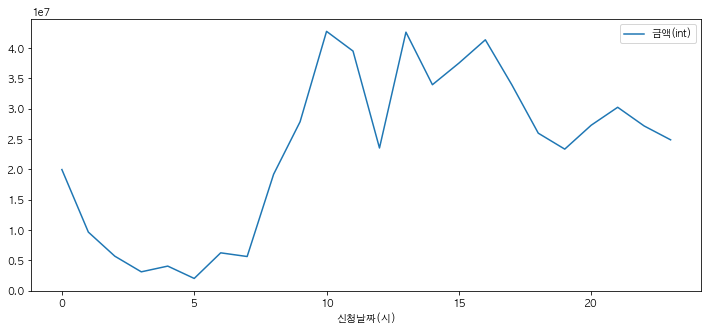

In [23]:
payments.pivot_table(values='금액(int)', index='신청날짜(시)', aggfunc='sum').plot(figsize=[12,5])

---

### Cleaning survey answer 

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>question_text</th>
      <th>answer1_text</th>
      <th>answer2_text</th>
      <th>answer3_text</th>
      <th>answer4_text</th>
      <th>answer5_text</th>
      <th>answer6_text</th>
      <th>answer7_text</th>
      <th>answer8_text</th>
      <th>answer9_text</th>
      <th>answer10_text</th>
      <th>answer11_text</th>
      <th>answer12_text</th>
    </tr>
    <tr>
      <th>question_id</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>데이터 사이언스를 배우고 싶은 이유는 무엇인가요?</td>
      <td>현재 다니는 직장에서 즉시 활용할만한 데이터 관련 지식을 습득하기 위해</td>
      <td>데이터와 인공지능 관련 석사/박사로 진학하기 위해</td>
      <td>풀타임 데이터 사이언티스트로 취업/이직을 하기 위해</td>
      <td>기술 창업을 위한 원천기술을 습득하기 위해</td>
      <td>최신 데이터사이언스 트렌드에 관심이 있어서</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2</th>
      <td>이전까지 수학, 통계학, 프로그래밍에 관한 공부를 얼만큼 하셨나요?</td>
      <td>최근 2~3년간 수학, 통계학 공부를 해 본 적이 없으며, 프로그래밍 역시 해 본 ...</td>
      <td>수학과 통계학은 자신 없지만, 프로그래밍은 조금 해 보았다.</td>
      <td>최근까지 수학과 통계학을 공부해왔지만, 프로그래밍은 해 본 적 없다.</td>
      <td>수학과 통계학을 공부하였으며, 프로그래밍도 할 줄 안다.</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>3</th>
      <td>데이터 사이언스를 어디에 활용하고 싶으신가요? (복수 선택 가능)</td>
      <td>상품, 컨텐츠 추천 엔진을 구현하고 싶다. (ex: 의류, 영화, 음악 추천 등)</td>
      <td>주가를 분석하고 예측할 수 있는 방법을 알고 싶다. (ex: 주가 등락, 비트코인 ...</td>
      <td>부동산 시세와 그 등락을 예측하고 싶다. (ex: 아파트, 점포, 오피스텔 등)</td>
      <td>텍스트 데이터를 적극 활용해보고 싶다. (ex: 스팸 필터링, 검색 엔진, 법률/판...</td>
      <td>이미지 데이터를 다뤄보고 싶다. (ex: 얼굴 인식, 자동차 표시판 분석 등)</td>
      <td>온라인 커머스에서 판매하는 상품의 재구매율을 늘리고 싶다.</td>
      <td>정기 구독 상품의 구독 이탈률(Churn Rate)을 낮출 수 있는 방법을 알고 싶다.</td>
      <td>마케팅 데이터를 분석하여, 온라인 마케팅의 효율을 높이고 싶다.</td>
      <td>해상사고나 범죄를 분석/예측하여 그 비율을 낮추고 싶다.</td>
      <td>의료 데이터나 신약 분석 등에 활용하고 싶다.</td>
      <td>공공데이터를 활용하는데 도움이 되고 싶다.</td>
      <td>기타</td>
    </tr>
    <tr>
      <th>4</th>
      <td>수강을 하면서 과제를 어느정도까지 완수하실 수 있으신가요?</td>
      <td>현재 하는 일이 바빠서, 과제가 주어지면 전혀 할 수가 없다.</td>
      <td>여가시간을 활용하여 무리하지 않는 선에서 어느정도의 과제는 해결할 수 있다.</td>
      <td>다소 시간이 넉넉하기 때문에 많은 과제가 주어진다고 해도 충분히 완수할 수 있다.</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>5</th>
      <td>DS School의 과정을 마친 후 데이터를 얼만큼 잘 다루고 싶은가요?</td>
      <td>취미로 데이터를 다뤄볼 수 있을 정도면 충분하다.</td>
      <td>대학원 연구실에 가도 뒤쳐지지 않을 만큼 이론과 실전 경험을 쌓고 싶다.</td>
      <td>현재 다니는 회사에서 데이터 관련 업무를 병행할 수 있을 만큼 실력을 쌓고 싶다.</td>
      <td>풀타임 데이터 사이언티스트로 취업/이직할 수 있을 만큼 실력을 쌓고 싶다.</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>6</th>
      <td>수업은 어느 시간을 선호하시나요? (중복 선택 가능)</td>
      <td>주중 아침</td>
      <td>주중 낮</td>
      <td>주중 저녁</td>
      <td>주말 아침</td>
      <td>주말 낮</td>
      <td>주말 저녁</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>7</th>
      <td>수업을 듣는 기간동안 얼만큼 시간을 할애할 수 있나요?</td>
      <td>현재 하는 일에 지장이 없는 선에서, 파트타임으로 수업을 들을 수 있다.</td>
      <td>현재 하는 일은 쉬는 한이 있더라도, 풀타임으로 수업을 듣고 싶다.</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>

In [24]:
answer_list = [f"answer{i}_selected(bool)" for i in range(1, 13)]

print(len(answer_list))
answer_list

12


['answer1_selected(bool)',
 'answer2_selected(bool)',
 'answer3_selected(bool)',
 'answer4_selected(bool)',
 'answer5_selected(bool)',
 'answer6_selected(bool)',
 'answer7_selected(bool)',
 'answer8_selected(bool)',
 'answer9_selected(bool)',
 'answer10_selected(bool)',
 'answer11_selected(bool)',
 'answer12_selected(bool)']

In [25]:
table = pd.pivot_table(surveys,
                       index = 'question_id',
                       values = answer_list,
                       aggfunc = pd.np.mean,
                       dropna = False)

table = table[answer_list].loc[[1,3]]
table

answer1_selected(bool)  answer2_selected(bool)  \
question_id                                                   
1                          0.321978                0.093082   
3                          0.372238                0.313507   

             answer3_selected(bool)  answer4_selected(bool)  \
question_id                                                   
1                          0.238010                0.074705   
3                          0.211327                0.371489   

             answer5_selected(bool)  answer6_selected(bool)  \
question_id                                                   
1                          0.272225                0.000000   
3                          0.244438                0.215821   

             answer7_selected(bool)  answer8_selected(bool)  \
question_id                                                   
1                          0.000000                0.000000   
3                          0.141958                0.437186   

             answer9_selected(bool)  answer10_selected(bool)  \
question_id                                                    
1                          0.000000                 0.000000   
3                          0.103079                 0.173421   

             answer11_selected(bool)  answer12_selected(bool)  
question_id                                                    
1                           0.000000                  0.00000  
3                           0.356281                  0.12368

---

### Purchase data & user data merge (id)

In [26]:
users = pd.read_sql("SELECT * FROM 'users'", connect)


data = (
    payments.merge(users, left_on = '이메일', right_on='email', how='inner')
                    .merge(surveys, on='user_id', how='inner')
)

print(data.shape)
data.head(3)

(3035, 53)


payment_id_x   이름                          이메일          연락처  \
0  aiym79ous7l8  고세준  0usbs4knns0s@dsschool.co.kr  01056007186   
1  aiym79ous7l8  고세준  0usbs4knns0s@dsschool.co.kr  01056007186   
2  aiym79ous7l8  고세준  0usbs4knns0s@dsschool.co.kr  01056007186   

                 신청날짜     신청수업       금액  결제방법     상태     연락처(clean)   기수 수업타입  \
0 2018-01-31 15:42:20  입문반 22기  495,000  카드결제  결제 완료  010-5600-7186  22기  입문반   
1 2018-01-31 15:42:20  입문반 22기  495,000  카드결제  결제 완료  010-5600-7186  22기  입문반   
2 2018-01-31 15:42:20  입문반 22기  495,000  카드결제  결제 완료  010-5600-7186  22기  입문반   

   상태(bool)  신청날짜(연)  신청날짜(월)  신청날짜(일)  신청날짜(시)  신청날짜(분)  신청날짜(초)   신청날짜(요일)  \
0      True     2018        1       31       15       42       20  Wednesday   
1      True     2018        1       31       15       42       20  Wednesday   
2      True     2018        1       31       15       42       20  Wednesday   

   금액(int)       user_id                                        mixpanel_id  \
0   495000  drdi7xmsj0nm  NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...   
1   495000  drdi7xmsj0nm  NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...   
2   495000  drdi7xmsj0nm  NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...   

  payment_id_y                        email           ...             \
0         None  0usbs4knns0s@dsschool.co.kr           ...              
1         None  0usbs4knns0s@dsschool.co.kr           ...              
2         None  0usbs4knns0s@dsschool.co.kr           ...              

  answer2_selected  answer3_selected answer4_selected answer5_selected  \
0                t                 f                f                f   
1                f                 f                t             None   
2                f                 f                t                t   

  answer6_selected answer7_selected answer8_selected answer9_selected  \
0             None             None             None             None   
1             None             None             None             None   
2                f                f                f                f   

  answer10_selected answer11_selected answer12_selected  \
0              None              None              None   
1              None              None              None   
2                 f                 t                 f   

                  created_at                 updated_at  \
0 2018-01-31 06:15:13.343156 2018-01-31 06:15:13.343156   
1 2018-01-31 06:15:23.300754 2018-01-31 06:15:23.300754   
2 2018-01-31 06:15:45.486897 2018-01-31 06:15:45.486897   

  answer1_selected(bool) answer2_selected(bool) answer3_selected(bool)  \
0                  False                   True                  False   
1                  False                  False                  False   
2                  False                  False                  False   

   answer4_selected(bool)  answer5_selected(bool)  answer6_selected(bool)  \
0                   False                   False                   False   
1                    True                   False                   False   
2                    True                    True                   False   

   answer7_selected(bool)  answer8_selected(bool)  answer9_selected(bool)  \
0                   False                   False                   False   
1                   False                   False                   False   
2                   False                   False                   False   

   answer10_selected(bool)  answer11_selected(bool)  answer12_selected(bool)  
0                    False                    False                    False  
1                    False                    False                    False  
2                    False                     True                    False  

[3 rows x 53 columns]

---

### Purchase data & user data: id(e-mail), user data & survey data: id(user_id) 

In [27]:
query = "SELECT * FROM payments \
         INNER JOIN users ON payments.이메일 = users.email \
         INNER JOIN surveys ON users.user_id = surveys.user_id" \

data_from_db = pd.read_sql(query, connect)

print(data_from_db.shape)
data_from_db.head(3)

(3884, 30)


payment_id   이름                          이메일            연락처  \
0  5vtq11wow61w  한서훈  3xy4zzr6k13x@dsschool.co.kr    01040513577   
1  209h7wqy7bdf  김재호  ao6kez00wxnh@dsschool.co.kr  010-6880-0251   
2  uh701zm4irgx  김재호  ao6kez00wxnh@dsschool.co.kr  010-7202-2433   

                  신청날짜     신청수업         금액  결제방법     상태       user_id  \
0  2018-01-03 14:44:12  입문반 19기    495,000  카드결제  결제 완료  orqcrchp0s2a   
1  2017-10-22 08:53:29  입문반 11기    495,000  카드결제  결제 완료  54ojyvp8ergj   
2  2017-12-21 16:47:00   딥러닝 2기  1,043,000  카드결제  결제 완료  54ojyvp8ergj   

                                         mixpanel_id payment_id  \
0  OJRXJURAXLJMMAWURTWSNBUJIRJJIVSHDHBBBPORBVRPPQ...       None   
1  REPODOLMGTJDYQVHMHOSDVDCLCXWQSKSJMUGCMXTTJBZSP...       None   
2  REPODOLMGTJDYQVHMHOSDVDCLCXWQSKSJMUGCMXTTJBZSP...       None   

                         email     survey_id       user_id  question_id  \
0  3xy4zzr6k13x@dsschool.co.kr  dt9gwdq9od02  orqcrchp0s2a            6   
1  ao6kez00wxnh@dsschool.co.kr  51yza3u3obtk  54ojyvp8ergj            6   
2  ao6kez00wxnh@dsschool.co.kr  51yza3u3obtk  54ojyvp8ergj            6   

  answer1_selected answer2_selected answer3_selected answer4_selected  \
0                f                f                f                t   
1                f                f                t                t   
2                f                f                t                t   

  answer5_selected answer6_selected answer7_selected answer8_selected  \
0                f                f             None             None   
1                t                t             None             None   
2                t                t             None             None   

  answer9_selected answer10_selected answer11_selected answer12_selected  \
0             None              None              None              None   
1             None              None              None              None   
2             None              None              None              None   

                   created_at                  updated_at  
0  2018-01-03 05:42:02.303657  2018-01-03 05:42:02.303657  
1  2018-01-06 08:47:19.325152  2018-01-06 08:47:19.325152  
2  2018-01-06 08:47:19.325152  2018-01-06 08:47:19.325152

---

In [28]:
# select relevant column 
selected_columns = ['user_id',  '이름', '연락처(clean)', '이메일', '신청수업', '금액(int)', '결제방법', '신청날짜', '상태(bool)', 'mixpanel_id']

selected_columns += [
    'question_id',
    'answer1_selected(bool)', 'answer2_selected(bool)', 'answer3_selected(bool)',
    'answer4_selected(bool)', 'answer5_selected(bool)', 'answer6_selected(bool)',
    'answer7_selected(bool)', 'answer8_selected(bool)', 'answer9_selected(bool)',
    'answer10_selected(bool)', 'answer11_selected(bool)', 'answer12_selected(bool)'
]

selected_columns += [
    'created_at', 'updated_at'
]

data = data[selected_columns]

print(data.shape)
data.head()

(3035, 25)


user_id   이름     연락처(clean)                          이메일     신청수업  \
0  drdi7xmsj0nm  고세준  010-5600-7186  0usbs4knns0s@dsschool.co.kr  입문반 22기   
1  drdi7xmsj0nm  고세준  010-5600-7186  0usbs4knns0s@dsschool.co.kr  입문반 22기   
2  drdi7xmsj0nm  고세준  010-5600-7186  0usbs4knns0s@dsschool.co.kr  입문반 22기   
3  drdi7xmsj0nm  고세준  010-5600-7186  0usbs4knns0s@dsschool.co.kr  입문반 22기   
4  drdi7xmsj0nm  고세준  010-5600-7186  0usbs4knns0s@dsschool.co.kr  입문반 22기   

   금액(int)  결제방법                신청날짜  상태(bool)  \
0   495000  카드결제 2018-01-31 15:42:20      True   
1   495000  카드결제 2018-01-31 15:42:20      True   
2   495000  카드결제 2018-01-31 15:42:20      True   
3   495000  카드결제 2018-01-31 15:42:20      True   
4   495000  카드결제 2018-01-31 15:42:20      True   

                                         mixpanel_id  question_id  \
0  NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...            1   
1  NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...            2   
2  NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...            3   
3  NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...            4   
4  NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...            5   

   answer1_selected(bool)  answer2_selected(bool)  answer3_selected(bool)  \
0                   False                    True                   False   
1                   False                   False                   False   
2                   False                   False                   False   
3                   False                   False                    True   
4                   False                    True                   False   

   answer4_selected(bool)  answer5_selected(bool)  answer6_selected(bool)  \
0                   False                   False                   False   
1                    True                   False                   False   
2                    True                    True                   False   
3                   False                   False                   False   
4                   False                   False                   False   

   answer7_selected(bool)  answer8_selected(bool)  answer9_selected(bool)  \
0                   False                   False                   False   
1                   False                   False                   False   
2                   False                   False                   False   
3                   False                   False                   False   
4                   False                   False                   False   

   answer10_selected(bool)  answer11_selected(bool)  answer12_selected(bool)  \
0                    False                    False                    False   
1                    False                    False                    False   
2                    False                     True                    False   
3                    False                    False                    False   
4                    False                    False                    False   

                  created_at                 updated_at  
0 2018-01-31 06:15:13.343156 2018-01-31 06:15:13.343156  
1 2018-01-31 06:15:23.300754 2018-01-31 06:15:23.300754  
2 2018-01-31 06:15:45.486897 2018-01-31 06:15:45.486897  
3 2018-01-31 06:15:52.621368 2018-01-31 06:15:52.621368  
4 2018-01-31 06:16:00.043586 2018-01-31 06:16:00.043586

In [29]:
data = data[data['신청날짜'] >= data['created_at']]

In [30]:
data = data.sort_values(by = ["이메일", "question_id", "created_at"])
data = data.drop_duplicates(['이메일', '신청수업', "question_id"], keep='last')

print(data.shape)
data.head()

(1092, 25)


user_id   이름     연락처(clean)                          이메일    신청수업  \
887  nkl4k2dfd2x6  강성우  010-5750-3618  08opbi2nzm6x@dsschool.co.kr  마케팅 3기   
888  nkl4k2dfd2x6  강성우  010-5750-3618  08opbi2nzm6x@dsschool.co.kr  마케팅 3기   
889  nkl4k2dfd2x6  강성우  010-5750-3618  08opbi2nzm6x@dsschool.co.kr  마케팅 3기   
890  nkl4k2dfd2x6  강성우  010-5750-3618  08opbi2nzm6x@dsschool.co.kr  마케팅 3기   
891  nkl4k2dfd2x6  강성우  010-5750-3618  08opbi2nzm6x@dsschool.co.kr  마케팅 3기   

     금액(int)  결제방법                신청날짜  상태(bool)  \
887   735000  카드결제 2018-01-17 15:45:55      True   
888   735000  카드결제 2018-01-17 15:45:55      True   
889   735000  카드결제 2018-01-17 15:45:55      True   
890   735000  카드결제 2018-01-17 15:45:55      True   
891   735000  카드결제 2018-01-17 15:45:55      True   

                                           mixpanel_id  question_id  \
887  YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...            1   
888  YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...            2   
889  YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...            3   
890  YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...            4   
891  YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...            5   

     answer1_selected(bool)  answer2_selected(bool)  answer3_selected(bool)  \
887                    True                   False                   False   
888                    True                   False                   False   
889                    True                   False                   False   
890                    True                   False                   False   
891                    True                   False                   False   

     answer4_selected(bool)  answer5_selected(bool)  answer6_selected(bool)  \
887                   False                   False                   False   
888                   False                   False                   False   
889                    True                   False                    True   
890                   False                   False                   False   
891                   False                   False                   False   

     answer7_selected(bool)  answer8_selected(bool)  answer9_selected(bool)  \
887                   False                   False                   False   
888                   False                   False                   False   
889                   False                   False                   False   
890                   False                   False                   False   
891                   False                   False                   False   

     answer10_selected(bool)  answer11_selected(bool)  \
887                    False                    False   
888                    False                    False   
889                    False                    False   
890                    False                    False   
891                    False                    False   

     answer12_selected(bool)                 created_at  \
887                    False 2018-01-17 06:31:38.247526   
888                    False 2018-01-17 06:31:42.281112   
889                    False 2018-01-17 06:31:55.697999   
890                    False 2018-01-17 06:31:59.842555   
891                    False 2018-01-17 06:32:03.640220   

                    updated_at  
887 2018-01-17 06:31:38.247526  
888 2018-01-17 06:31:42.281112  
889 2018-01-17 06:31:55.697999  
890 2018-01-17 06:31:59.842555  
891 2018-01-17 06:32:03.640220

---

### survey question no 1,3 answer

In [31]:
table_purchased = pd.pivot_table(data,
                                 index='question_id',
                                 values=answer_list,
                                 aggfunc='mean')

table_purchased = table_purchased[answer_list].loc[[1,3]]

table_purchased

answer1_selected(bool)  answer2_selected(bool)  \
question_id                                                   
1                          0.301282                0.121795   
3                          0.467949                0.410256   

             answer3_selected(bool)  answer4_selected(bool)  \
question_id                                                   
1                          0.262821                0.076923   
3                          0.256410                0.455128   

             answer5_selected(bool)  answer6_selected(bool)  \
question_id                                                   
1                          0.237179                    0.00   
3                          0.282051                    0.25   

             answer7_selected(bool)  answer8_selected(bool)  \
question_id                                                   
1                          0.000000                0.000000   
3                          0.211538                0.410256   

             answer9_selected(bool)  answer10_selected(bool)  \
question_id                                                    
1                          0.000000                 0.000000   
3                          0.096154                 0.198718   

             answer11_selected(bool)  answer12_selected(bool)  
question_id                                                    
1                           0.000000                 0.000000  
3                           0.384615                 0.134615

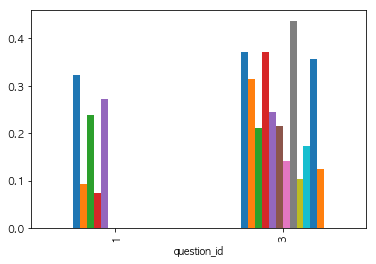

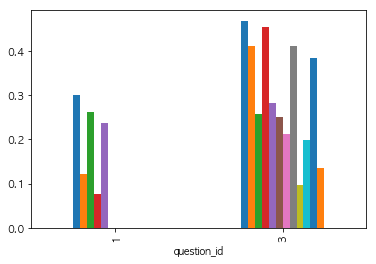

In [32]:
table.plot(kind='bar', legend=False)

table_purchased.plot(kind='bar', legend=False)

---

### session time & time to purchase

In [33]:
time = data['신청날짜'] - data['created_at']
time.head()

887   09:14:16.752474
888   09:14:12.718888
889   09:13:59.302001
890   09:13:55.157445
891   09:13:51.359780
dtype: timedelta64[ns]

In [34]:
time.dt.components.head(2)

days  hours  minutes  seconds  milliseconds  microseconds  nanoseconds
887     0      9       14       16           752           474            0
888     0      9       14       12           718           888            0

In [35]:
time_int = \
time.dt.components['days'] + time.dt.components['hours'] / 24 + time.dt.components['minutes'] / (24*60) + time.dt.components['seconds'] / (24 * 60 * 60)

time_int.head()

887    0.384907
888    0.384861
889    0.384711
890    0.384664
891    0.384618
dtype: float64

In [36]:
(time.dt.total_seconds()/(60*60*24)).head()

887    0.384916
888    0.384869
889    0.384714
890    0.384666
891    0.384622
dtype: float64

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})

/Users/oliverkim/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 25)

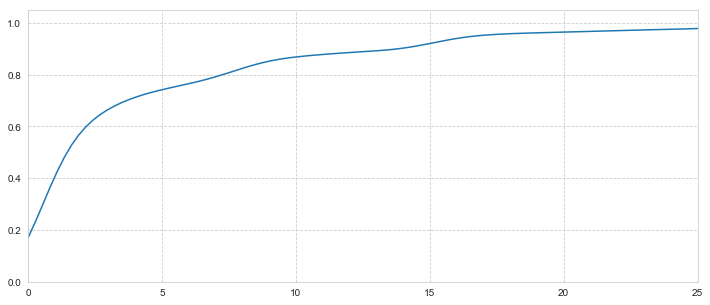

In [40]:
# to calculate the purchase rate before 10 days (the length of day to purchase)
plt.figure(figsize=[12,5])
ax = sns.distplot(time_int,
                  hist=False,
                  #hist_kws=dict(cumulative=True),
                  kde_kws={'cumulative' : True})

ax.set_xlim(0, 25)

### Merge mixpanel data (mixpanel_id & user table, payment_id & payments table)

In [41]:
mixpanel_data = pd.read_csv('data/mixpanel_people_profiles_revised.csv')

print(mixpanel_data.shape)
mixpanel_data.head()

(17902, 20)


class_name created_at initial_referring_domain utm_campaign [first touch]  \
0        NaN        NaN     dsschool.pagedemo.co                        NaN   
1        NaN        NaN     dsschool.pagedemo.co                        NaN   
2        NaN        NaN     dsschool.pagedemo.co                        NaN   
3        NaN        NaN     dsschool.pagedemo.co                        NaN   
4        NaN        NaN     dsschool.pagedemo.co                        NaN   

  utm_campaign [last touch] utm_content [first touch]  \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4                       NaN                       NaN   

  utm_content [last touch] utm_medium [first touch] utm_medium [last touch]  \
0                      NaN                      NaN                     NaN   
1                      NaN                      NaN                     NaN   
2                      NaN                      NaN                     NaN   
3                      NaN                      NaN                     NaN   
4                      NaN                      NaN                     NaN   

  utm_source [first touch] utm_source [last touch] utm_term [first touch]  \
0                      NaN                     NaN                    NaN   
1                      NaN                     NaN                    NaN   
2                      NaN                     NaN                    NaN   
3                      NaN                     NaN                    NaN   
4                      NaN                     NaN                    NaN   

  utm_term [last touch]              initial_referrer            last_seen  \
0                   NaN  http://dsschool.pagedemo.co/  2017-06-16T22:00:21   
1                   NaN  http://dsschool.pagedemo.co/  2017-06-19T19:03:36   
2                   NaN  http://dsschool.pagedemo.co/  2017-06-21T23:34:02   
3                   NaN  http://dsschool.pagedemo.co/  2017-06-26T07:43:58   
4                   NaN  http://dsschool.pagedemo.co/  2017-06-26T15:03:48   

        os          browser     city country_code  \
0      iOS  Facebook Mobile    Seoul           KR   
1      iOS    Mobile Safari  Incheon           KR   
2  Windows          Firefox    Seoul           KR   
3      iOS  Facebook Mobile    Seoul           KR   
4  Android           Chrome    Seoul           KR   

                                         distinct_id  
0  VGGPBLBXCDGZOSCVCODTNZBICKURLVAFKASUMZCNZQHEIU...  
1  TIKFTLTMQQLYMKSDPCFCPNSOLHKLOQWQMIMKXBRUPVKEOD...  
2  WMFONVUFEIFDJOOZWJHPMTRKPDMKHPDBQSYKYTACHVODOL...  
3  DYXLHORZUNPSZSEXOIRNGCZWMEHHNKCTACJOFEEWEAFYVX...  
4  BRQEHDPQRESBAIAURZIPTHTPDMJZSBBNACVCNMQFGXVXIP...

In [42]:
mixpanel_payments = (
    mixpanel_data.merge(users, how='inner', left_on='distinct_id', right_on='mixpanel_id')
                 .merge(payments, how='left', on='payment_id')
)    
print(mixpanel_payments.shape)
print(mixpanel_data.shape)

mixpanel_payments.head()

(13875, 44)
(17902, 20)


class_name           created_at initial_referring_domain  \
0        NaN  2017-09-01T09:27:57                  $direct   
1        NaN  2017-09-25T11:08:25                  $direct   
2        NaN  2017-11-27T16:59:25     dsschool.pagedemo.co   
3        NaN  2017-11-30T15:44:16                  $direct   
4        NaN  2018-01-01T16:03:02                  $direct   

  utm_campaign [first touch] utm_campaign [last touch]  \
0                        NaN                       NaN   
1                        NaN                       NaN   
2                        NaN                       NaN   
3                        NaN                       NaN   
4                        NaN                       NaN   

  utm_content [first touch] utm_content [last touch] utm_medium [first touch]  \
0                       NaN                      NaN                      NaN   
1                       NaN                      NaN                      NaN   
2                       NaN                      NaN                      NaN   
3                       NaN                      NaN                      NaN   
4                       NaN                      NaN                      NaN   

  utm_medium [last touch] utm_source [first touch] utm_source [last touch]  \
0                     NaN                      NaN                     NaN   
1                     NaN                      NaN                     NaN   
2                     NaN                      NaN                     NaN   
3                     NaN                      NaN                     NaN   
4                     NaN                      NaN                     NaN   

  utm_term [first touch] utm_term [last touch]              initial_referrer  \
0                    NaN                   NaN                       $direct   
1                    NaN                   NaN                       $direct   
2                    NaN                   NaN  http://dsschool.pagedemo.co/   
3                    NaN                   NaN                       $direct   
4                    NaN                   NaN                       $direct   

             last_seen       os            browser      city country_code  \
0  2017-09-01T09:30:07  Android             Chrome     Seoul           KR   
1  2017-09-25T11:08:33  Windows             Chrome     Seoul           KR   
2  2017-11-27T16:59:36      iOS    Facebook Mobile     Seoul           KR   
3  2017-11-30T15:44:27  Windows  Internet Explorer  Suwon-si           KR   
4  2018-01-01T16:03:09  Windows             Chrome     Seoul           KR   

                                         distinct_id       user_id  \
0  DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...  j81umpsxbqer   
1  JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...  gc3riqbpec5a   
2  DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...  h47v07u6u5zm   
3  AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...  v6ln67rwsqo4   
4  MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...  mbwhfxfmmowu   

                                         mixpanel_id    payment_id  \
0  DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...          None   
1  JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...          None   
2  DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...          None   
3  AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...  86dpwpocr5gi   
4  MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...          None   

                         email   이름                          이메일          연락처  \
0  xgyd2m7cz1tz@dsschool.co.kr  NaN                          NaN          NaN   
1  ww4rloe4l6to@dsschool.co.kr  NaN                          NaN          NaN   
2  i97zkjstv1mz@dsschool.co.kr  NaN                          NaN          NaN   
3  w2gcxxhaam4s@dsschool.co.kr  이초현  g8zyxqrdgcgf@dsschool.co.kr  01088615300   
4  rnippqcfcr09@dsschool.co.kr  NaN                          NaN          NaN   

                 신청날짜    신청수업       금액  결제방법     상태

### purchase rate  (type of campaigns)

In [43]:
mixpanel_payments = mixpanel_payments[mixpanel_payments['utm_campaign [first touch]'].notnull()]

In [44]:
mixpanel_payments.loc[mixpanel_payments['상태(bool)'] == True, '상태(bool)'] = 1
mixpanel_payments.loc[mixpanel_payments['상태(bool)'] != True, '상태(bool)'] = 0

In [45]:
(
    pd.pivot_table(mixpanel_payments, values='상태(bool)', index='utm_campaign [first touch]', aggfunc='mean')
    .sort_values('상태(bool)', ascending=False)
    .head(10)
)

상태(bool)
utm_campaign [first touch]          
dsschoolintro               0.333333
dripinsta7                  0.066667
kang1                       0.066667
5why2                       0.055556
startup                     0.054054
leveltest                   0.041667
search2                     0.040000
purchase_complete           0.035714
fbpage                      0.030303
univmajor                   0.028037

In [46]:
# Create pivot by campaigns which are up to 20 people 
campaign = mixpanel_payments['utm_campaign [first touch]'].value_counts()

In [47]:
over20_campaign = campaign[campaign > 20]
over20_campaign.head()

$none                  2166
soldout                 643
deeplearningtraffic     632
problem                 327
ryoovideo               264
Name: utm_campaign [first touch], dtype: int64

In [48]:
over20_data = mixpanel_payments[mixpanel_payments['utm_campaign [first touch]'].isin(over20_campaign.index)]

(
    pd.pivot_table(over20_data, values='상태(bool)', index='utm_campaign [first touch]', aggfunc='mean')
    .sort_values('상태(bool)', ascending=False)
    .head(10)
)

상태(bool)
utm_campaign [first touch]          
dripinsta7                  0.066667
startup                     0.054054
leveltest                   0.041667
search2                     0.040000
purchase_complete           0.035714
fbpage                      0.030303
univmajor                   0.028037
sungwon                     0.026316
Clab                        0.024390
deeplearningtraffic         0.022152

---

### Define consumers (purchase more than 2 classes based on purchase data)

In [49]:
payments_complete = payments[payments["상태(bool)"] == True]

payments_complete = payments_complete.sort_values('신청날짜')
payments_complete = payments_complete.drop_duplicates(['이름', '이메일', "신청수업"], keep='last')

payments_email_counts = payments_complete["이메일"].value_counts()
payments_email_counts = payments_email_counts[payments_email_counts > 1]

payments_complete = payments_complete[payments_complete["이메일"].isin(payments_email_counts.index)]
payments_complete = payments_complete.sort_values(by = ['이름', '이메일', "신청수업"])

print(payments_complete.shape)
payments_complete.head()

(810, 21)


payment_id   이름                          이메일            연락처  \
185  mv7ohoittyov  강대규  uvhy2cm6jexv@dsschool.co.kr  010-7764-0861   
328  i49gohaqdc7g  강대규  z5it9d3am5pn@dsschool.co.kr  010-2810-1605   
503  mpuhgmvwrvxy  강민종  5y6m9tz8a0ua@dsschool.co.kr    01061528224   
208  di32b3c6b9gn  강서진  w9df010ys6yd@dsschool.co.kr  010-5450-6814   
572  opszgo4rdggk  강서진  w9df010ys6yd@dsschool.co.kr  010-6775-1500   

                   신청날짜     신청수업         금액  결제방법     상태     연락처(clean)   기수  \
185 2018-01-02 10:59:50   딥러닝 2기  1,043,000  카드결제  결제 완료  010-7764-0861   2기   
328 2017-11-30 10:47:22  입문반 17기    495,000  카드결제  결제 완료  010-2810-1605  17기   
503 2017-10-30 23:31:11  입문반 12기    495,000  카드결제  결제 완료  010-6152-8224  12기   
208 2017-12-28 17:54:17   딥러닝 2기  1,043,000  카드결제  결제 완료  010-5450-6814   2기   
572 2017-10-18 11:23:25  입문반 11기    495,000  카드결제  결제 완료  010-6775-1500  11기   

    수업타입  상태(bool)  신청날짜(연)  신청날짜(월)  신청날짜(일)  신청날짜(시)  신청날짜(분)  신청날짜(초)  \
185  딥러닝      True     2018        1        2       10       59       50   
328  입문반      True     2017       11       30       10       47       22   
503  입문반      True     2017       10       30       23       31       11   
208  딥러닝      True     2017       12       28       17       54       17   
572  입문반      True     2017       10       18       11       23       25   

      신청날짜(요일)  금액(int)  
185    Tuesday  1043000  
328   Thursday   495000  
503     Monday   495000  
208   Thursday  1043000  
572  Wednesday   495000

In [50]:
payments_complete[payments_complete.duplicated(subset=['이름', '이메일'], keep=False)].head()

payment_id   이름                          이메일            연락처  \
208  di32b3c6b9gn  강서진  w9df010ys6yd@dsschool.co.kr  010-5450-6814   
572  opszgo4rdggk  강서진  w9df010ys6yd@dsschool.co.kr  010-6775-1500   
362  fim5rxkhv9ba  강서진  w9df010ys6yd@dsschool.co.kr  010-8055-5565   
456  dziqvrn49knl  강선영  1n04ko1pgq3r@dsschool.co.kr  010-4714-5480   
675  k8wd2krz3qcg  강선영  1n04ko1pgq3r@dsschool.co.kr  010-1746-0407   

                   신청날짜     신청수업         금액  결제방법     상태     연락처(clean)   기수  \
208 2017-12-28 17:54:17   딥러닝 2기  1,043,000  카드결제  결제 완료  010-5450-6814   2기   
572 2017-10-18 11:23:25  입문반 11기    495,000  카드결제  결제 완료  010-6775-1500  11기   
362 2017-11-22 08:07:11   중급반 4기    594,000  카드결제  결제 완료  010-8055-5565   4기   
456 2017-11-04 17:50:57   딥러닝 1기  1,043,000  카드결제  결제 완료  010-4714-5480   1기   
675 2017-09-13 22:56:56   입문반 9기    495,000  카드결제  결제 완료  010-1746-0407   9기   

    수업타입  상태(bool)  신청날짜(연)  신청날짜(월)  신청날짜(일)  신청날짜(시)  신청날짜(분)  신청날짜(초)  \
208  딥러닝      True     2017       12       28       17       54       17   
572  입문반      True     2017       10       18       11       23       25   
362  중급반      True     2017       11       22        8        7       11   
456  딥러닝      True     2017       11        4       17       50       57   
675  입문반      True     2017        9       13       22       56       56   

      신청날짜(요일)  금액(int)  
208   Thursday  1043000  
572  Wednesday   495000  
362  Wednesday   594000  
456   Saturday  1043000  
675  Wednesday   495000

In [51]:
num_bought = payments_complete.loc[payments_complete.duplicated(subset=['이름', '이메일'], keep=False), '이메일'].value_counts()\
.to_frame(name='구매 강좌수')

print(num_bought.shape)
num_bought.head(5)

(149, 1)


구매 강좌수
1n04ko1pgq3r@dsschool.co.kr       4
uzzsngp7nk7z@dsschool.co.kr       3
uhvsbw6cjg19@dsschool.co.kr       3
9u2mz3w23uhk@dsschool.co.kr       3
18vwfdfclejc@dsschool.co.kr       3